In [2]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

In [3]:
codigos_de_negociacao = ["^BVSP", "BRL=X"]
hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)
dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)
display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close               Close              High            \
               BRL=X     ^BVSP     BRL=X     ^BVSP   BRL=X     ^BVSP   
Date                                                                   
2022-02-08  5.262600  112234.0  5.262600  112234.0  5.2849  112251.0   
2022-02-09  5.258400  112461.0  5.258400  112461.0  5.2880  113163.0   
2022-02-10  5.234500  113359.0  5.234500  113359.0  5.2446  113812.0   
2022-02-11  5.248700  113572.0  5.248700  113572.0  5.2512  114899.0   
2022-02-14  5.249956  113807.0  5.249956  113807.0  5.2633  114167.0   
...              ...       ...       ...       ...     ...       ...   
2023-02-01  5.072200  112303.0  5.072200  112303.0  5.0868  113598.0   
2023-02-02  5.053500  109935.0  5.053500  109935.0  5.0545  112943.0   
2023-02-03  5.049200  108490.0  5.049200  108490.0  5.1347  110570.0   
2023-02-06  5.149800  108456.0  5.149800  108456.0  5.2060  108710.0   
2023-02-07  5.145700  107920.0  5.145700  107920.0  5.2057  109037.0   

                 Low                Open           Volume              
               BRL=X     ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                   
2022-02-08  5.251000  110943.0  5.262800  111995.0      0  10157500.0  
2022-02-09  5.232774  111710.0  5.256489  112233.0      0  13794500.0  
2022-02-10  5.170000  112163.0  5.231429  112462.0      0  13267900.0  
2022-02-11  5.182800  113128.0  5.248600  113368.0      0  18602800.0  
2022-02-14  5.195300  113358.0  5.250500  113643.0      0  10757600.0  
...              ...       ...       ...       ...    ...         ...  
2023-02-01  5.047900  110729.0  5.072200  113430.0      0  17821500.0  
2023-02-02  4.941700  109747.0  5.053500  112072.0      0  15241800.0  
2023-02-03  5.046758  108185.0  5.049200  110141.0      0  13235300.0  
2023-02-06  5.147992  107416.0  5.149800  108518.0      0  11514600.0  
2023-02-07  5.133384  107234.0  5.145700  108727.0      0  12956300.0  

[261 rows x 12 columns]

In [4]:
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['dolar' , 'ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-02-08,5.262600,112234.0
2022-02-09,5.258400,112461.0
2022-02-10,5.234500,113359.0
2022-02-11,5.248700,113572.0
2022-02-14,5.249956,113807.0
...,...,...
2023-02-01,5.072200,112303.0
2023-02-02,5.053500,109935.0
2023-02-03,5.049200,108490.0


# Manipulando os dados

In [5]:
# resample = redimensionamento
#last = o ultimo fechamento
dados_anuais = dados_fechamento.resample('Y').last()
dados_mensais = dados_fechamento.resample('M').last()
dados_mensais

,dolar,ibovespa
Date,,
2022-02-28,5.1222,113142.0
2022-03-31,4.7697,119999.0
2022-04-30,4.9378,107876.0
2022-05-31,4.7524,111351.0
2022-06-30,5.1809,98542.0
2022-07-31,5.1827,103165.0
2022-08-31,5.1219,109523.0
2022-09-30,5.3962,110037.0
2022-10-31,5.2885,116037.0


In [11]:

# pct_change = Calcula a alteração percentual da linha imediatamente anterior por padrão. Isso é útil para comparar a porcentagem de alteração em uma série temporal de elementos.
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

retorno_diario.head(50)

,dolar,ibovespa
Date,,
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
2022-02-15,-0.006849,0.007495
2022-02-16,-0.010760,0.004544
2022-02-17,-0.004285,-0.014351
2022-02-18,0.006776,-0.006694
2022-02-21,-0.006402,-0.009249


In [24]:
retorno_diario_dolar = retorno_diario.iloc[-1, 0:]
retorno_mensal_dolar = retorno_mensal.iloc[-1, 0:]
retorno_anual_dolar = retorno_anual.iloc[-1, 0:]
print(retorno_anual_dolar)

dolar      -0.022993
ibovespa   -0.019186
Name: 2023-12-31 00:00:00, dtype: float64


In [26]:
retorno_diario_dolar = round((retorno_diario_dolar * 100),2)
retorno_mensal_dolar = round((retorno_mensal_dolar * 100),2)
retorno_anual_dolar = round((retorno_anual * 100),2)

In [27]:
retorno_anual_dolar

,dolar,ibovespa
Date,,
2023-12-31,-2.3,-1.92


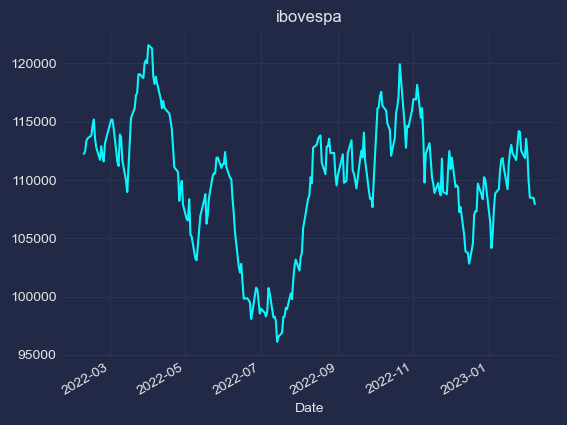

In [30]:
plt.style.use('cyberpunk')


dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False)


plt.title("ibovespa")

#plt.savefig("ibovespa.png", dpi = 300)
plt.show()

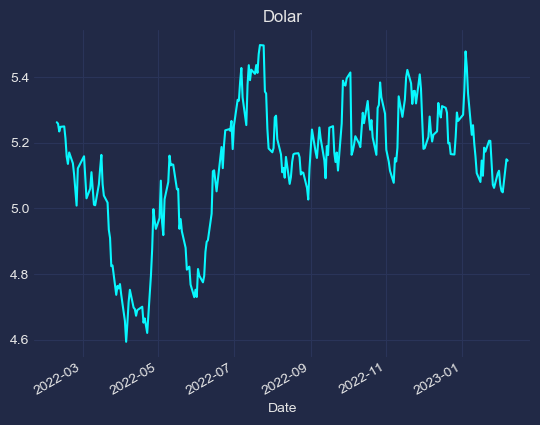

In [31]:
plt.style.use('cyberpunk')


dados_fechamento.plot(y = "dolar", use_index = True, legend = False)


plt.title("Dolar")

#plt.savefig("dolar.png", dpi = 300)
plt.show()